# United States Unemployment Rate


Unemployment Rate is a percentage of unemployed residents in relation to the total civilian labor force. In the indicator calculation, the person who has been actively seeking job during the past four weeks and cannot start working right now is defined as unemployed. Such a person is included in the unemployment rate regardless of whether this person is receiving unemployment benefits.

Unemployment statistics data is collected by interviewing approximately 110,000 people (60,000 households) across the nation. Individuals under 16, those serving in the armed forces, persons in correctional facilities and psychiatric hospitals are excluded from the survey.

This indicator (also called U3) is the most commonly used rate for assessing the state of the US labor market. But this is not the only indicator of unemployment available. For example, its difference from U6 is that individuals employed part-time or temporarily due to economic reasons are not included in the statistics and are considered employed according to U3. Also the indicator does not take into account people who wish to work but cannot due to different reasons (such as disability and others) and those who have become discouraged after seeking job and no longer seek employment. So, U3 is often criticized for showing a very optimistic picture of the labor market.

The unemployment rate is one of the key indicators of the country's economic development. It is not a predictive indicator. Its growth or decline is a result of changes in the economic situation.

Decrease of unemployment is seen as positive for dollar quotes.
            
source:
- https://www.mql5.com/en/economic-calendar/united-states/unemployment-rate
- https://www.mql5.com/en/economic-calendar/united-states/unemployment-rate/export


# Set Parameters

In [1]:
# Directory where I store original data (copied form the Web, etc.)
original_data_directory = "D:\\Drive\\market_indicators\\original\\"

# Directory where we will save data we create
derived_data_directory = "D:\\Drive\\market_indicators\\original\\"

# The file we analyze in this notebook
file_name = "united-states.unemployment-rate.csv"

date_format = "yyyy.mm.dd" # 2007.04.05

"yyyy.mm.dd"

# Libraries Used

In [2]:
using DataFrames, CSV, Dates, Plots

# Read Data

## Identify the columns

In [3]:
using DataFrames, CSV

df = CSV.read(original_data_directory*file_name, dateformat=date_format)

for i in 1:size(df)[2] # number of columns
    println("column: ", i, " ", names(df)[i])
end

column: 1 Date
column: 2 ActualValue
column: 3 ForecastValue
column: 4 PreviousValue


In [4]:
# Sample the data

show(df[end-5:end, # row to row
        [1,2,3,4]] # column to column
    , allcols=true) # do NOT limit number of columns if more than 6

6×4 DataFrame
│ Row │ Date       │ ActualValue │ ForecastValue │ PreviousValue │
│     │ Date       │ Float64     │ Float64?      │ Float64?      │
├─────┼────────────┼─────────────┼───────────────┼───────────────┤
│ 1   │ 2007-08-03 │ 4.6         │ missing       │ 4.5           │
│ 2   │ 2007-07-06 │ 4.5         │ missing       │ 4.5           │
│ 3   │ 2007-06-01 │ 4.5         │ missing       │ 4.5           │
│ 4   │ 2007-05-04 │ 4.5         │ missing       │ 4.4           │
│ 5   │ 2007-04-06 │ 4.4         │ missing       │ 4.5           │
│ 6   │ 2007-03-09 │ 4.5         │ missing       │ missing       │

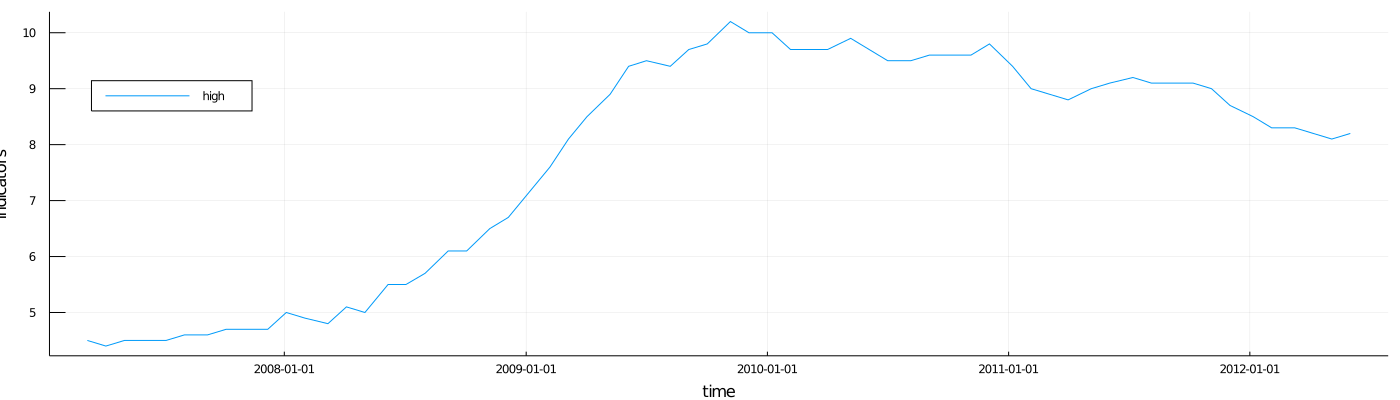

In [7]:
using Plots

rows = 100:163
gr()
plot(df[ rows,1 ], 
    [ df[rows,2]  ], 
    label    = ["high" "low" "adjusted" "volume"],
    legend    =:topleft, # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (1400, 400), # width, height
    layout = (1, 1)
    )

In [ ]:
include("MarketIndicators.jl")

In [ ]:
using DataFrames, CSV

file_path = "data/united-states.unemployment-rate.csv"
# TODO auto re-load weekly
#download( "https://www.mql5.com/en/economic-calendar/united-states/unemployment-rate/export" , file_path ) # URL, name to save
df = fetch_data(file_path, "yyyy.mm.dd" ) # date format that is stored in teh file
last(df, 30)

# Sort DataFrame by Date

In [ ]:
using DataFrames, CSV
df = sort(df, order(:Date, rev=false) );
last(df, 30)

In [ ]:
select!(df, Not(:ForecastValue ))
select!(df, Not(:PreviousValue ))

In [ ]:
using Formatting
using Plots
gr()
plot(df[:,1], 
    [df[:,2] ], 
    label    = ["ActualValue" "ForecastValue" "PreviousValue"],
    legend    =:topleft, # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "amount",
    size     = (1300, 600), # width, height
    #yformatter = :plain, # or scientific
    yformatter = yi -> string("", format( yi, commas=true ), "%"), # e.g. \$ $2,000,000
    layout = (1, 1)
    )

In [ ]:
CSV.write("data/processed/united-states.unemployment-rate.csv", df, delim = ',')